# Students' mental health EDA

The goal of this notebook is to provide comprehensive EDA and probably gain valuable insights into students' menthal health problem.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (15, 9)})

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/university-students-mental-health/mentalhealth_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/university-students-mental-health/mentalhealth_dataset.csv')

In [3]:
df.head()

,Timestamp,Gender,Age,Course,YearOfStudy,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
0,13/7/2020,Female,24,Biotechnology,Year 3,2.38,1,0,0,0,5,0,4,5,8,2
1,13/7/2020,Female,18,Biotechnology,Year 3,4.00,0,1,0,0,0,0,4,4,13,5
2,13/7/2020,Female,25,Biotechnology,Year 3,3.68,0,0,1,0,3,0,1,2,13,1
3,13/7/2020,Female,18,Engineering,year 4,4.00,0,0,0,0,3,0,5,1,19,2
4,13/7/2020,Female,20,Engineering,year 4,2.00,1,1,0,0,0,0,2,4,3,2


In [4]:
df.shape

(1000, 16)

In [5]:
df.describe()

,Age,CGPA,Depression,Anxiety,PanicAttack,SpecialistTreatment,SymptomFrequency_Last7Days,HasMentalHealthSupport,SleepQuality,StudyStressLevel,StudyHoursPerWeek,AcademicEngagement
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,21.402000,3.122530,0.483000,0.474000,0.458000,0.067000,3.4980,0.067000,2.983000,3.045000,9.746000,3.055000
std,2.373611,0.810961,0.499961,0.499573,0.498482,0.250147,2.3081,0.250147,1.417999,1.417386,5.651497,1.422673
min,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,2.250000,0.000000,0.000000,0.000000,0.000000,1.7500,0.000000,2.000000,2.000000,5.000000,2.000000
50%,21.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.0000,0.000000,3.000000,3.000000,9.000000,3.000000
75%,24.000000,4.000000,1.000000,1.000000,1.000000,0.000000,6.0000,0.000000,4.000000,4.000000,15.000000,4.000000
max,25.000000,4.000000,1.000000,1.000000,1.000000,1.000000,7.0000,1.000000,5.000000,5.000000,19.000000,5.000000


In [6]:
df.isna().sum()

Timestamp                     0
Gender                        0
Age                           0
Course                        0
YearOfStudy                   0
CGPA                          0
Depression                    0
Anxiety                       0
PanicAttack                   0
SpecialistTreatment           0
SymptomFrequency_Last7Days    0
HasMentalHealthSupport        0
SleepQuality                  0
StudyStressLevel              0
StudyHoursPerWeek             0
AcademicEngagement            0
dtype: int64

Wow. We have 1000 entries. No missing values. Data looks promissing, it would be interesting to know what features correlate with anxiety and depresion and to check, wheather anxiety and depression have negative effects on CGPA.

## `Timestamp`

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


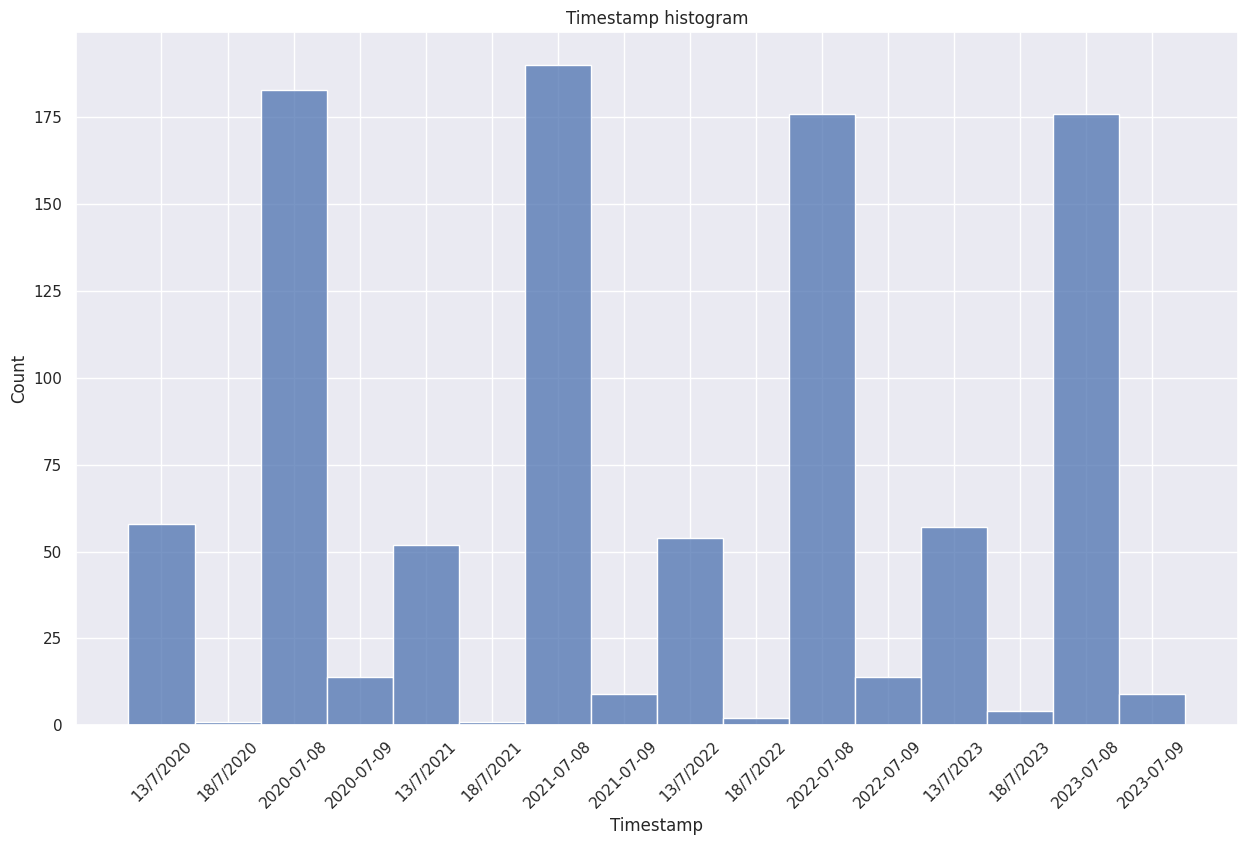

In [7]:
g = sns.histplot(df, x='Timestamp', discrete=True)
g.set(title='Timestamp histogram')
xticks = g.get_xticks()
xticks_labels = g.get_xticklabels()
g.tick_params(axis='x', labelrotation=45);


Hm. We observe strange peaks at certain dates. Probably these are days when dataset's owner published it somewhere.

## `Gender`

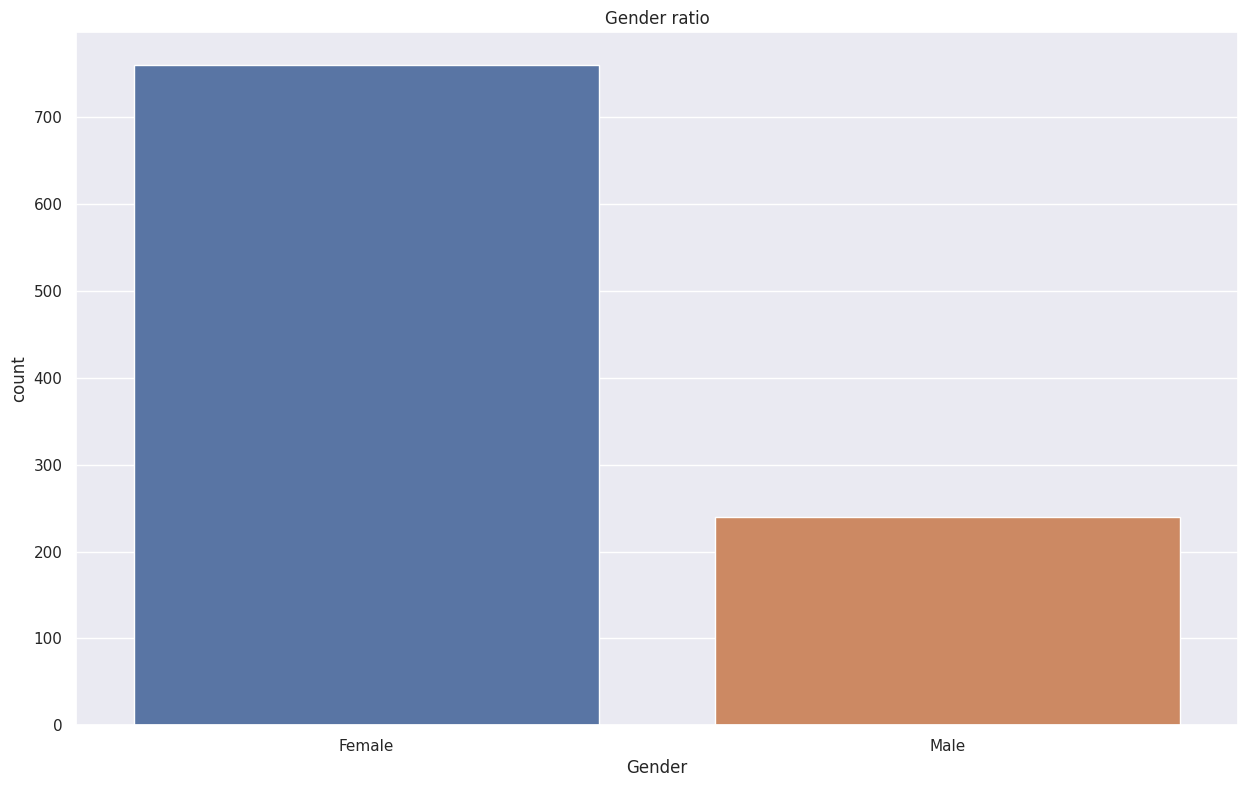

In [8]:
sns.countplot(df, x='Gender').set(title='Gender ratio');

Wow. Many women took part in the survey, significantly more than men. That's interesting. We will check later the same ratios for different courses.

## `Age`

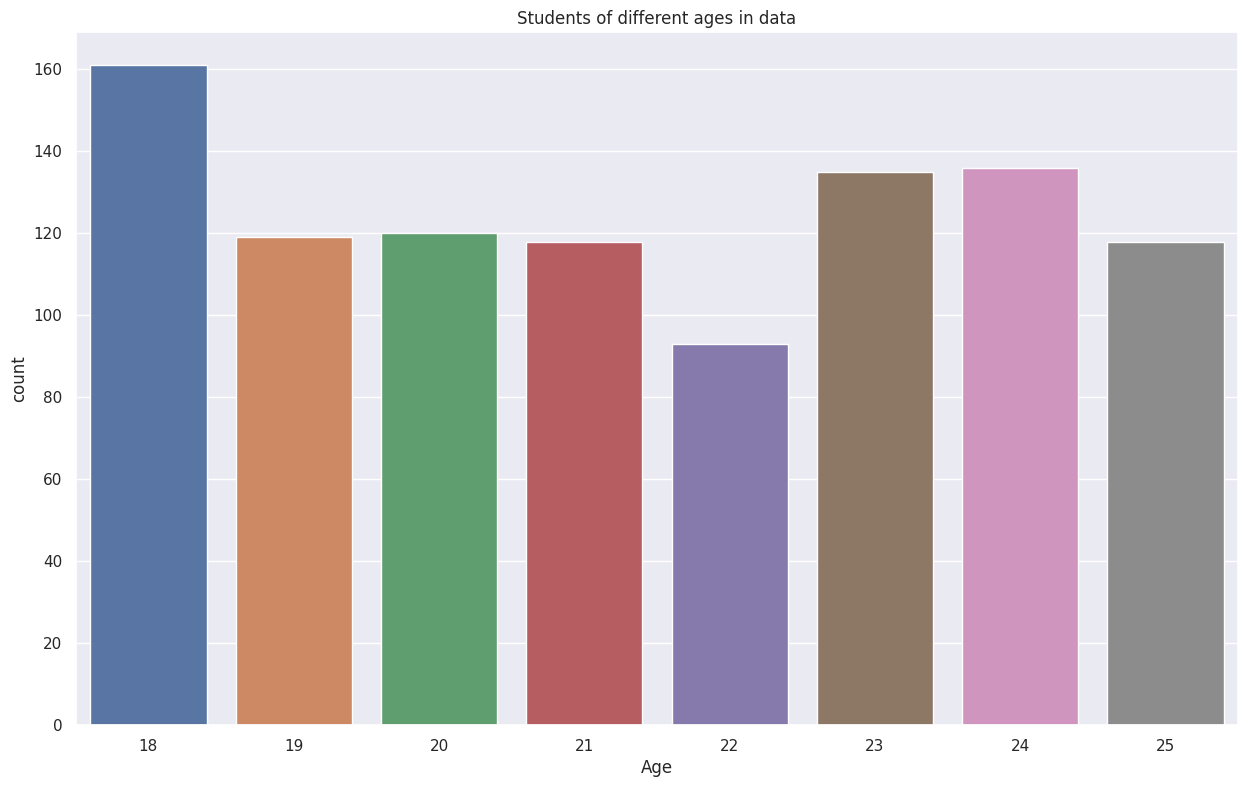

In [9]:
sns.countplot(df, x='Age').set(title='Students of different ages in data');

Nice. Dataset is slightly unballanced, but we have enough samples for ages from 18 to 25 years old. Let's check wheather gender ratio varies significantly for any age group.

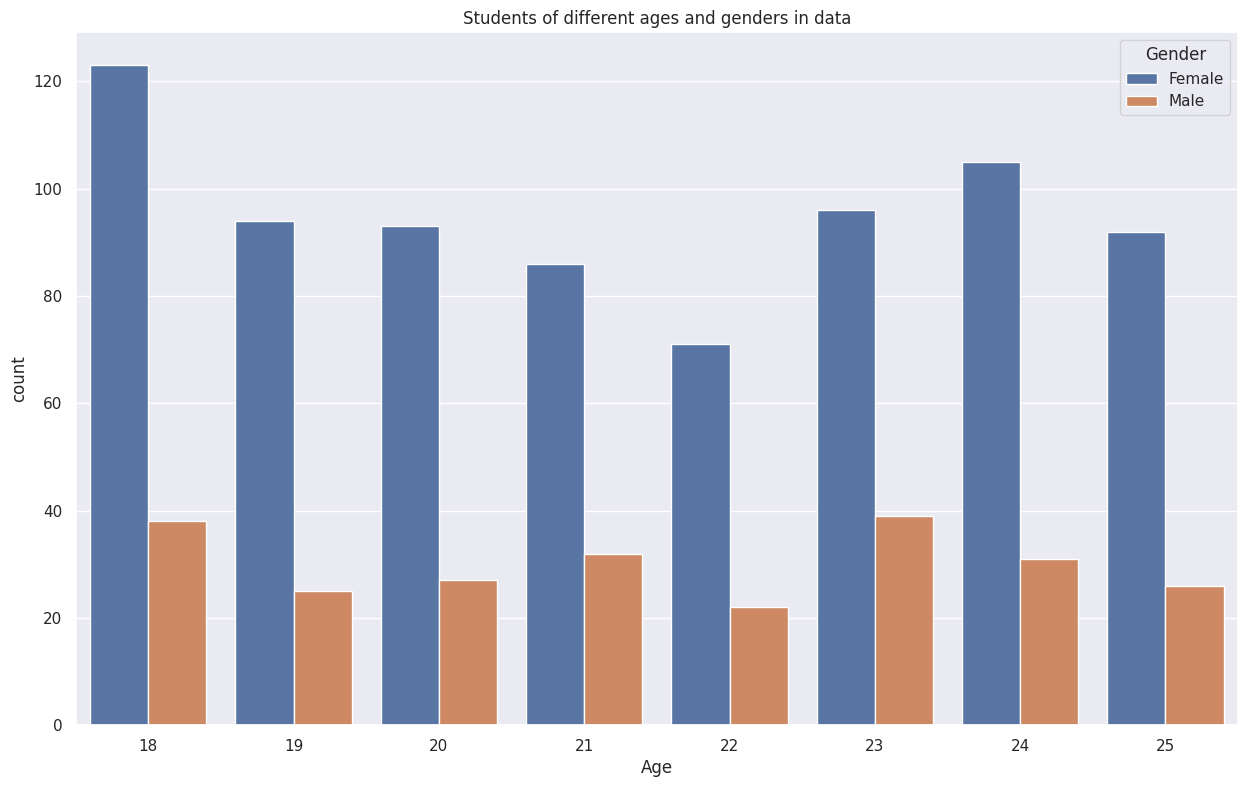

In [10]:
sns.countplot(df, x='Age', hue='Gender').set(title='Students of different ages and genders in data');

We observe no suspicious gender disbalance for any age group.

## `Course`

In [11]:
df.Course.value_counts()

Course
Engineering                180
BCS                        177
BIT                        101
KOE                         39
Biomedical science          33
Engine                      19
Laws                        19
psychology                  17
BENL                        16
CTS                         15
Business Administration     14
Koe                         14
engin                       14
Human Sciences              13
Nursing                     13
Law                         13
Communication               13
Marine science              12
Psychology                  12
Kirkhs                      12
Malcom                      12
Pendidikan Islam            12
Accounting                  11
DIPLOMA TESL                11
Usuluddin                   11
Fiqh                        11
KIRKHS                      10
Irkhs                       10
Pendidikan islam            10
ENM                          9
Human Resources              9
Mathemathics                 9
F

Okay, we have lot's of different courses here. Let's visualise only the most popular ones.

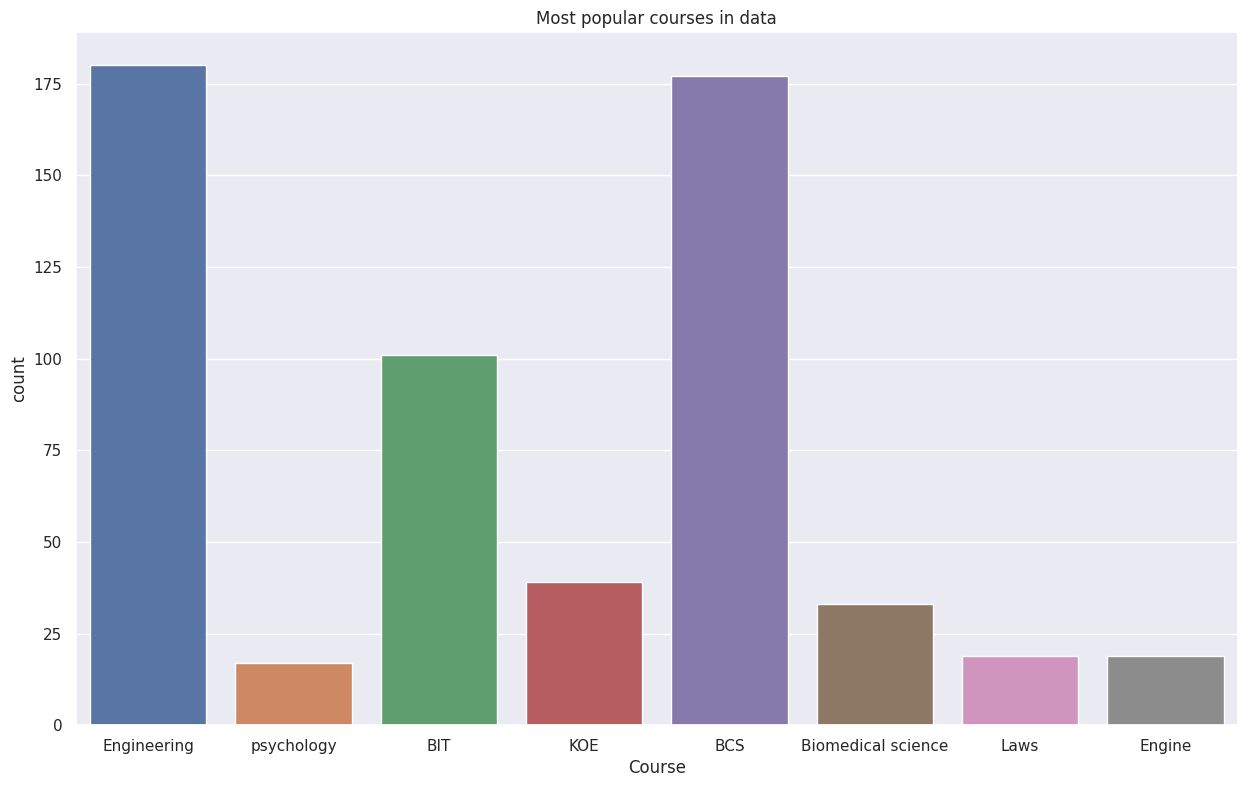

In [12]:
sns.countplot(df[df.Course.apply(lambda x: df.Course.value_counts()[x] > 16)], x='Course').set(title='Most popular courses in data');

Data seems reasanoble enough. Let's check gender ratios for different courses.

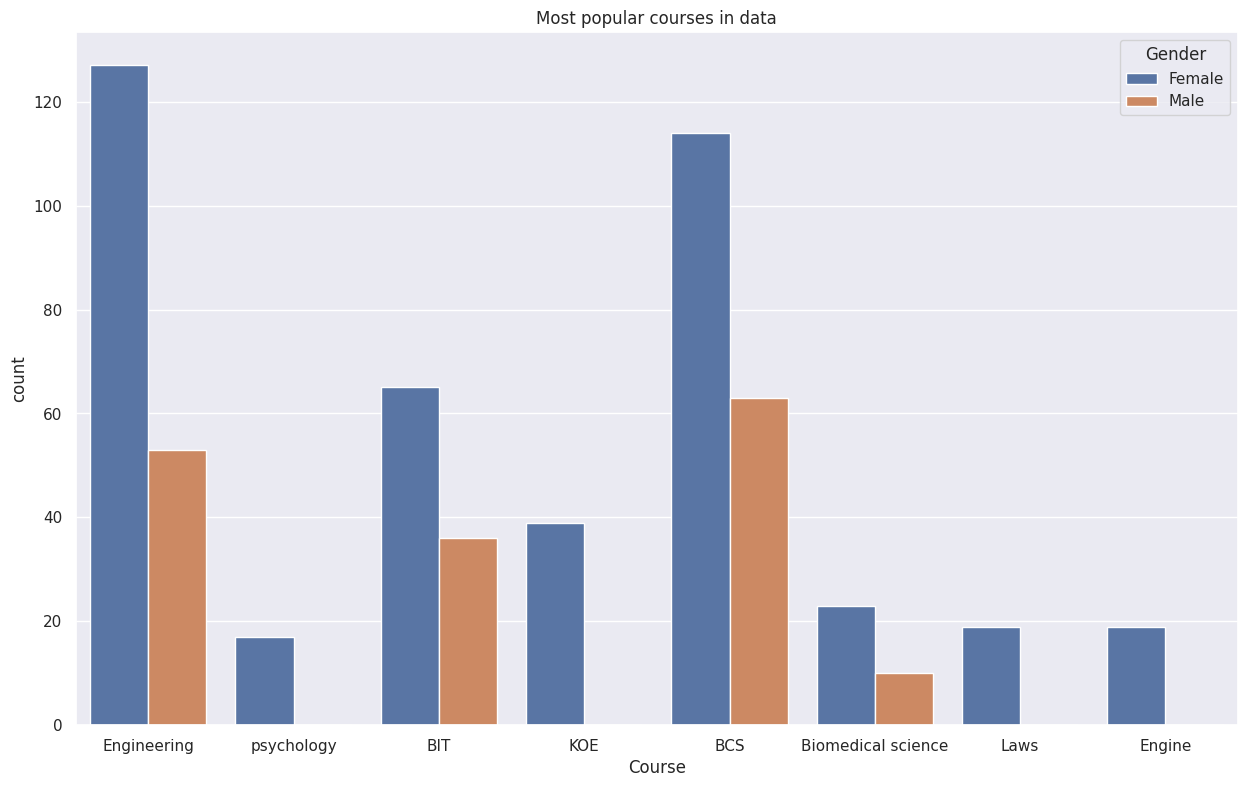

In [13]:
sns.countplot(df[df.Course.apply(lambda x: df.Course.value_counts()[x] > 16)], x='Course', hue='Gender').set(title='Most popular courses in data');

Aha. We observe that we do not have data on male participants of psycology, KOE (I'm not sure what that is), laws and engine (?), but we have more male participants on engineering, BIT (Bachelor of Information Technology) and BCS (Bachelor of Computer Science).

## `YearOfStudy`

In [14]:
df.YearOfStudy.value_counts()

YearOfStudy
year 1    390
Year 3    185
Year 2    178
year 2     96
year 4     74
year 3     55
Year 1     22
Name: count, dtype: int64

We need a little cleanup here. Let's make all data in this column lowercase.

In [15]:
df.YearOfStudy = df.YearOfStudy.str.lower()

In [16]:
df.YearOfStudy.value_counts()

YearOfStudy
year 1    412
year 2    274
year 3    240
year 4     74
Name: count, dtype: int64

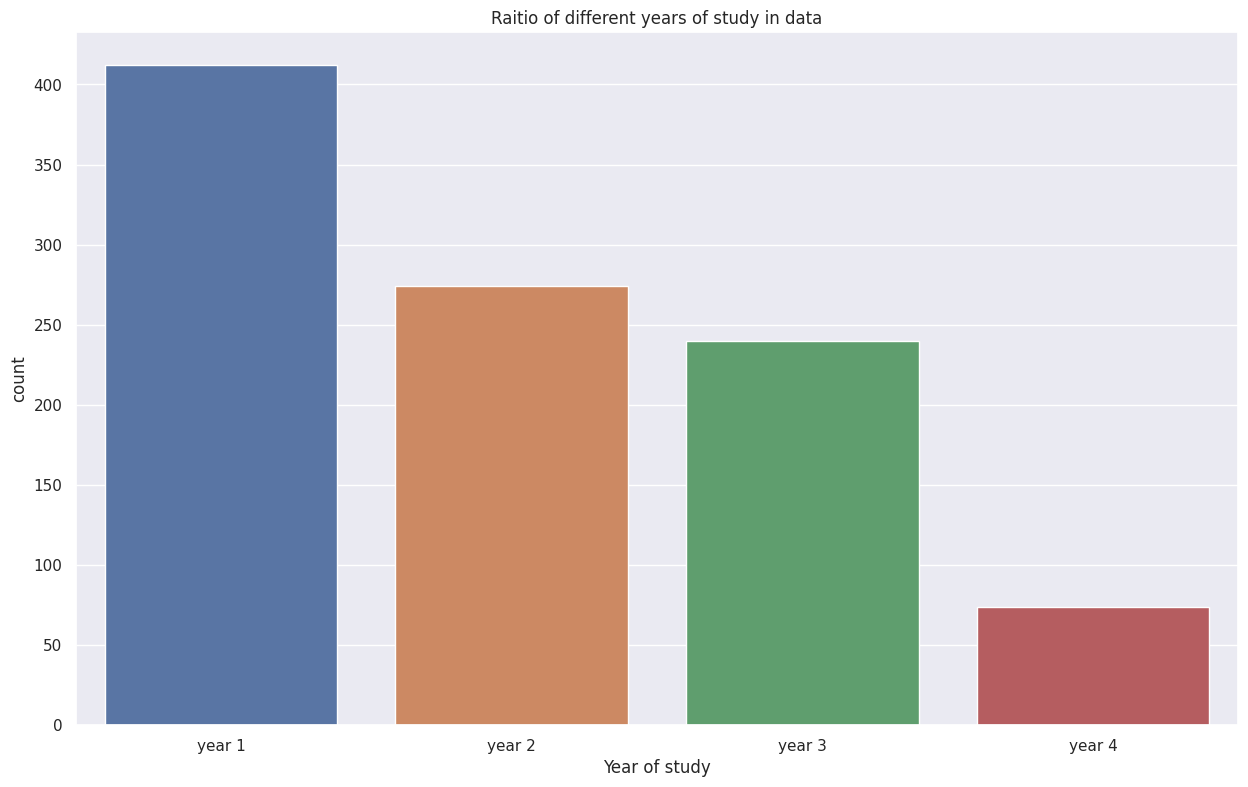

In [17]:
sns.countplot(df.sort_values(by='YearOfStudy'), x='YearOfStudy').set(title='Raitio of different years of study in data', xlabel='Year of study');

Nice. Probably first year students were more motivated to participate in a survery?

## `CGPA`

CGPA is Cumulative Grade Point Average, a significant indicator of academic performance (high CGPA = good performance).

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


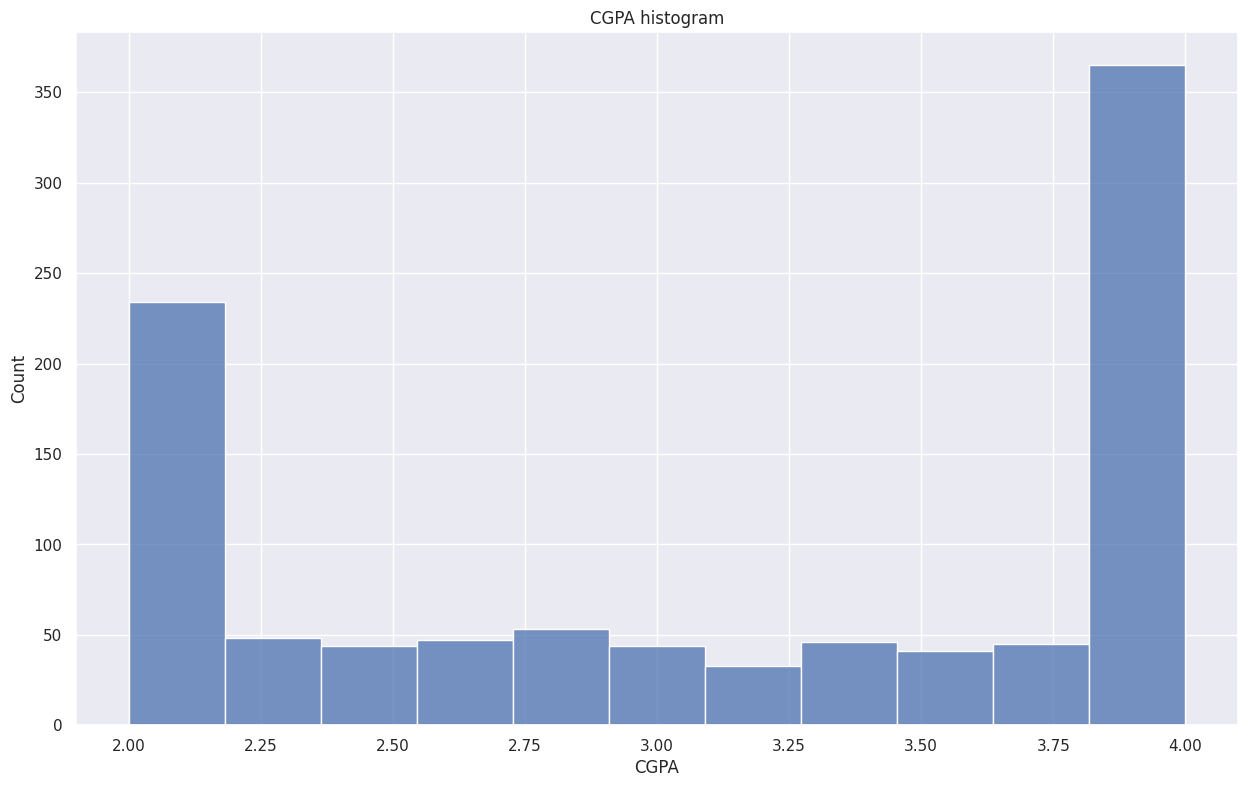

In [18]:
sns.histplot(df, x='CGPA').set(title='CGPA histogram');

We observe two peaks at 4.0 (excellent performance) and 2.0 (bad performance). Otherwise data looks okay.

## `Depression`

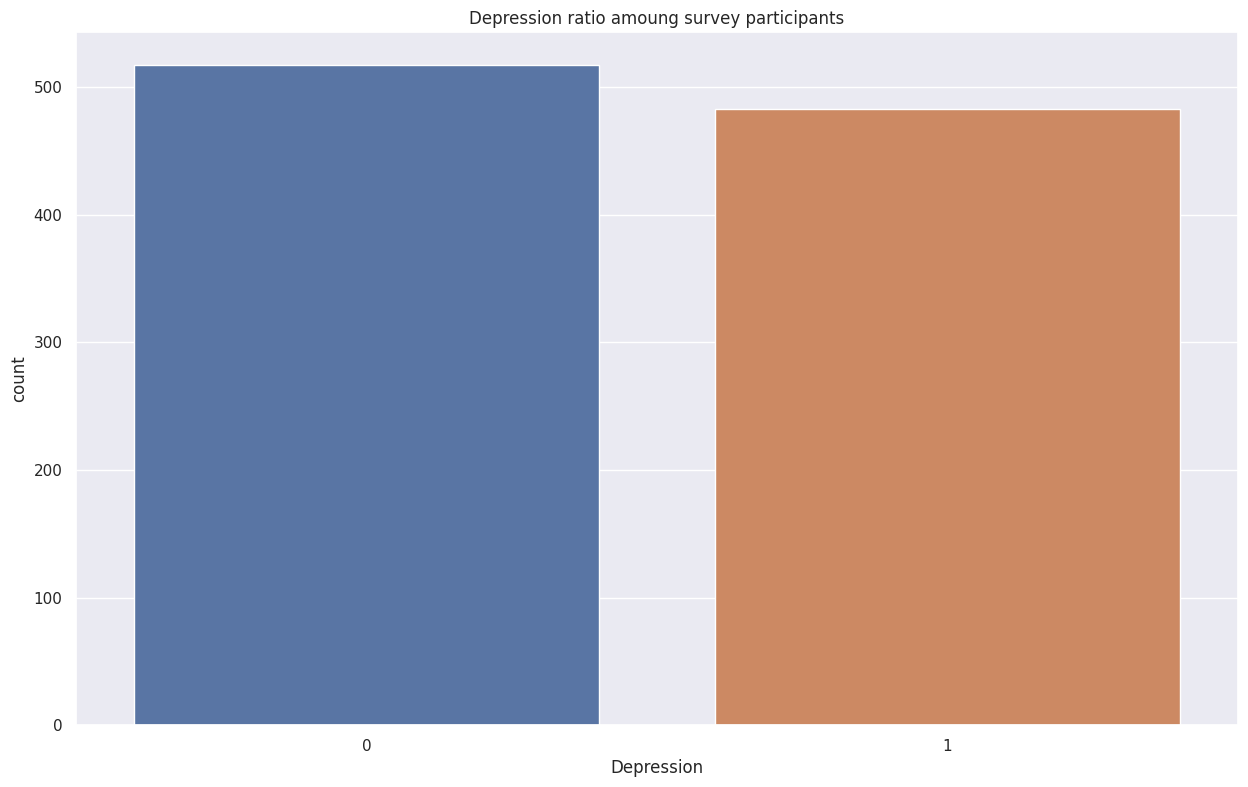

In [19]:
sns.countplot(df, x='Depression').set(title='Depression ratio amoung survey participants');

That's unexpected. We observe really high depression rate. Probably students with depression were more motivated to participate in the survey? Let's check wheather depression rate depends on gender or year of study.

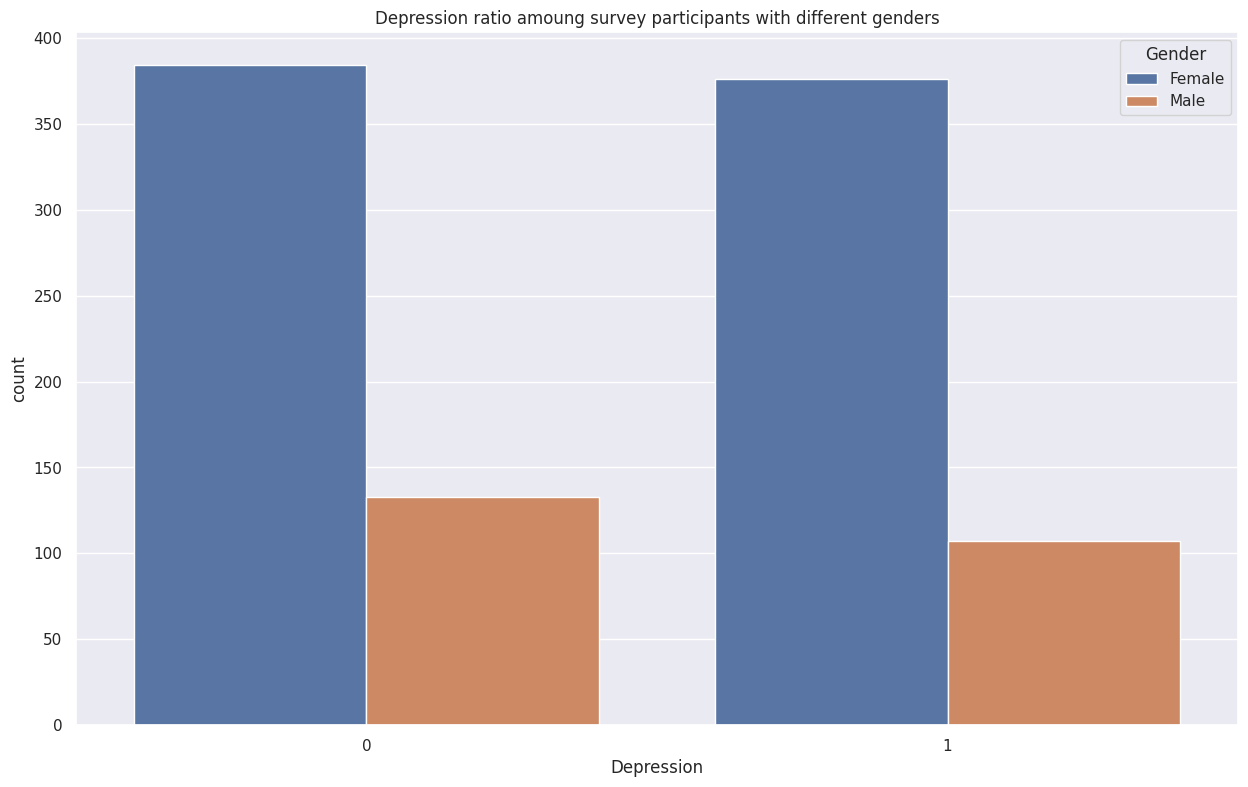

In [20]:
sns.countplot(df, x='Depression', hue='Gender').set(title='Depression ratio amoung survey participants with different genders');

No significant difference in depression ratios amoung genders.

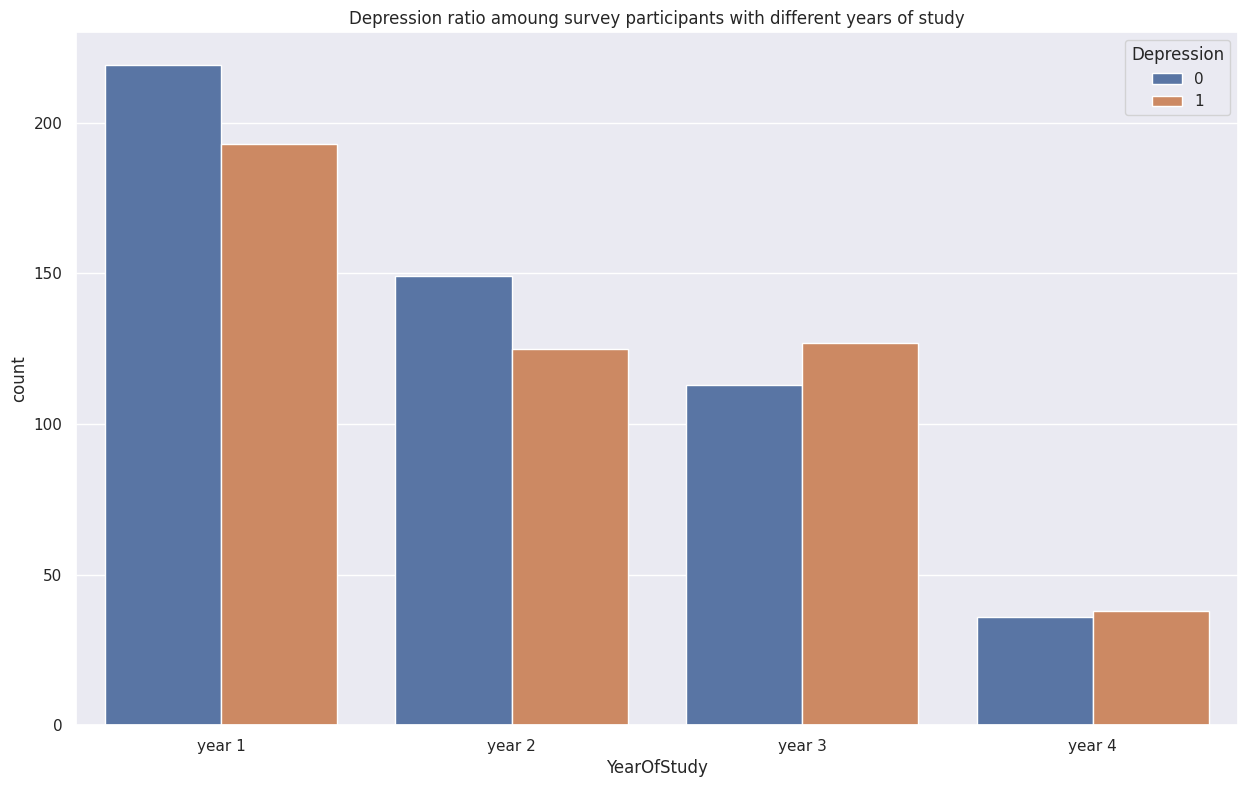

In [21]:
sns.countplot(df.sort_values(by='YearOfStudy'), hue='Depression', x='YearOfStudy').set(title='Depression ratio amoung survey participants with different years of study');

Hm. Depression levels are high amoung participants of all years of study, but they are higher amoung year 3 and 4. 

## `Anxiety`

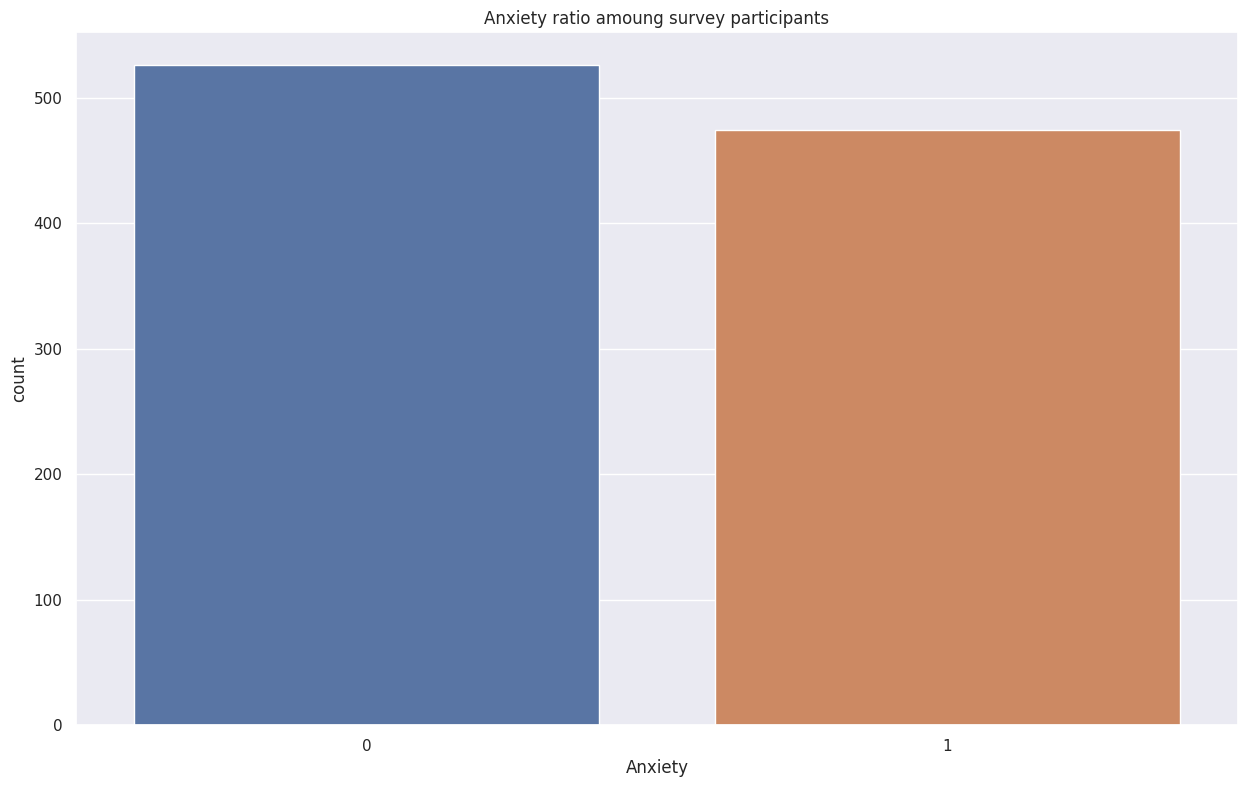

In [22]:
sns.countplot(df, x='Anxiety').set(title='Anxiety ratio amoung survey participants');

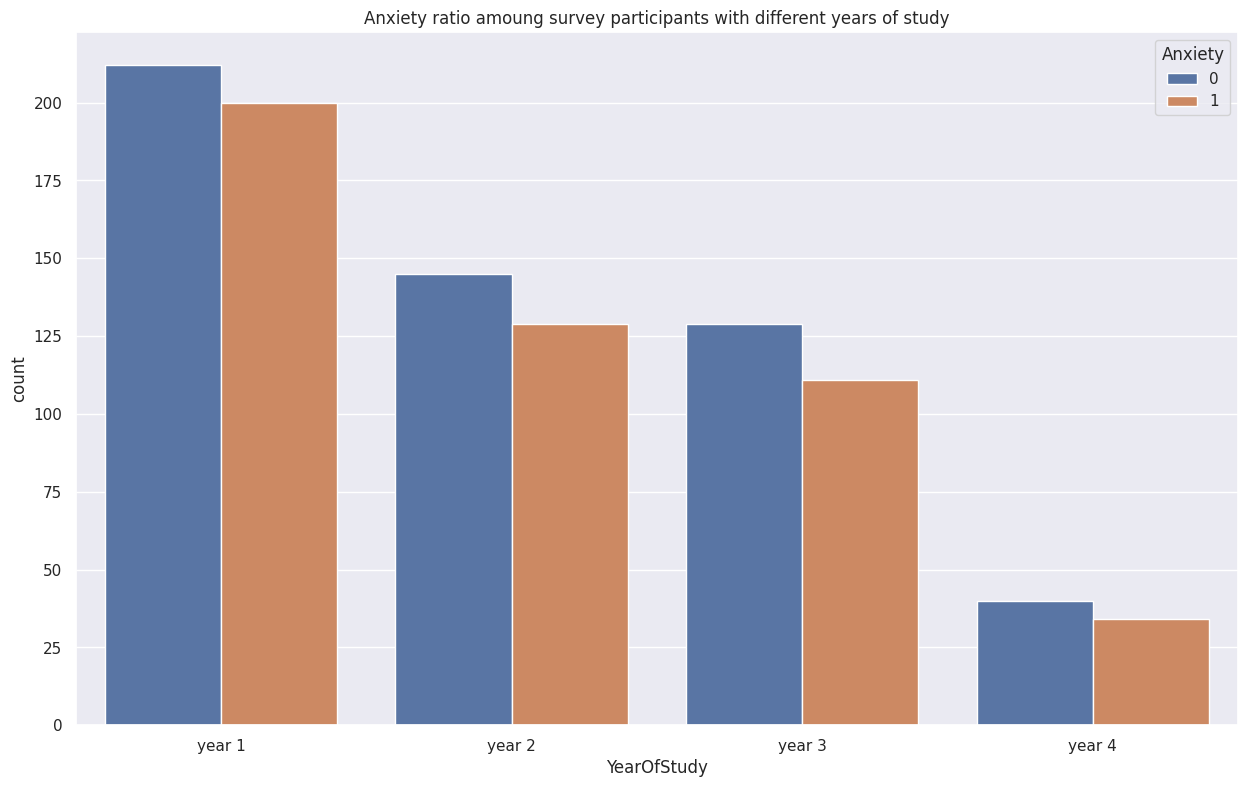

In [23]:
sns.countplot(df.sort_values(by='YearOfStudy'), hue='Anxiety', x='YearOfStudy').set(title='Anxiety ratio amoung survey participants with different years of study');

Anxiety levels are also high amoung all students.

## `PanicAttack`

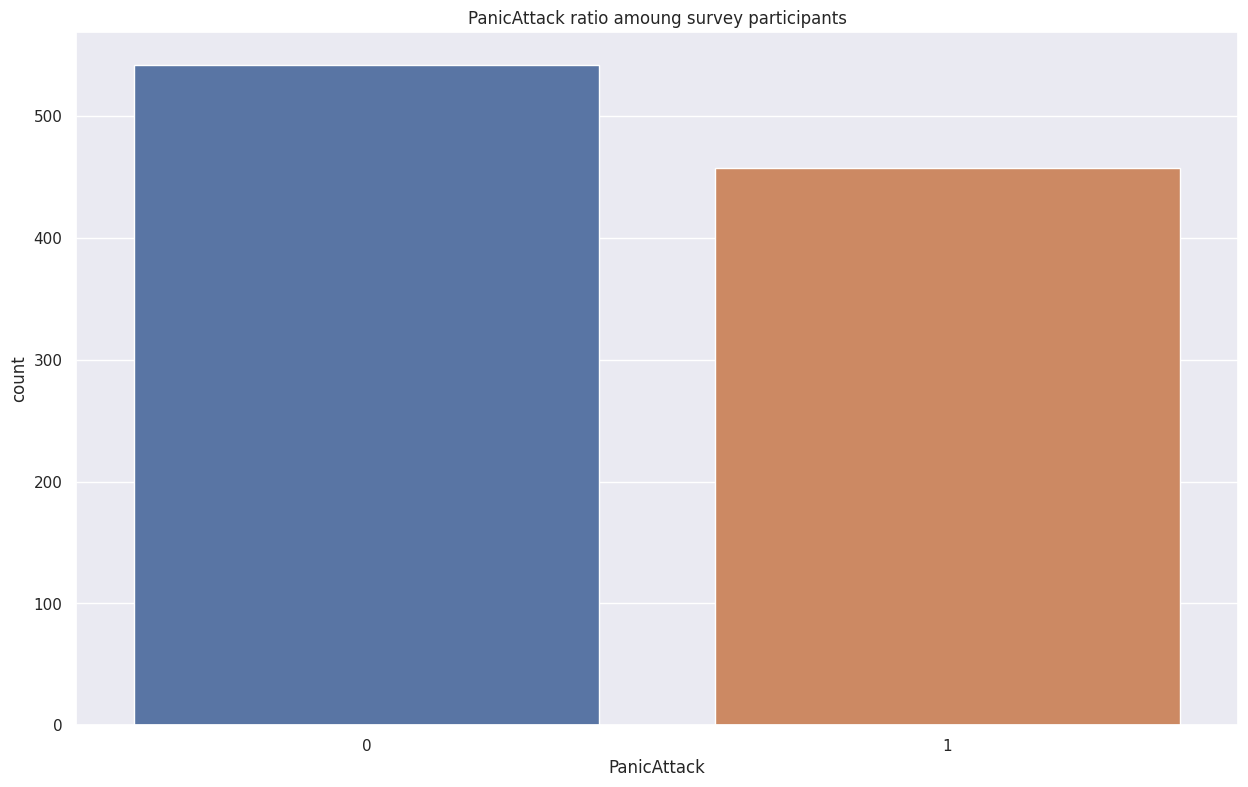

In [24]:
sns.countplot(df, x='PanicAttack').set(title='PanicAttack ratio amoung survey participants');

Let's check that depression, anxiety and panic attacks are highly correlated.

In [25]:
df[['Depression', 'Anxiety', 'PanicAttack']].corr()

,Depression,Anxiety,PanicAttack
Depression,1.000000,0.048325,-0.004876
Anxiety,0.048325,1.000000,0.027768
PanicAttack,-0.004876,0.027768,1.000000


Wait, that's strange. No correlation at all?

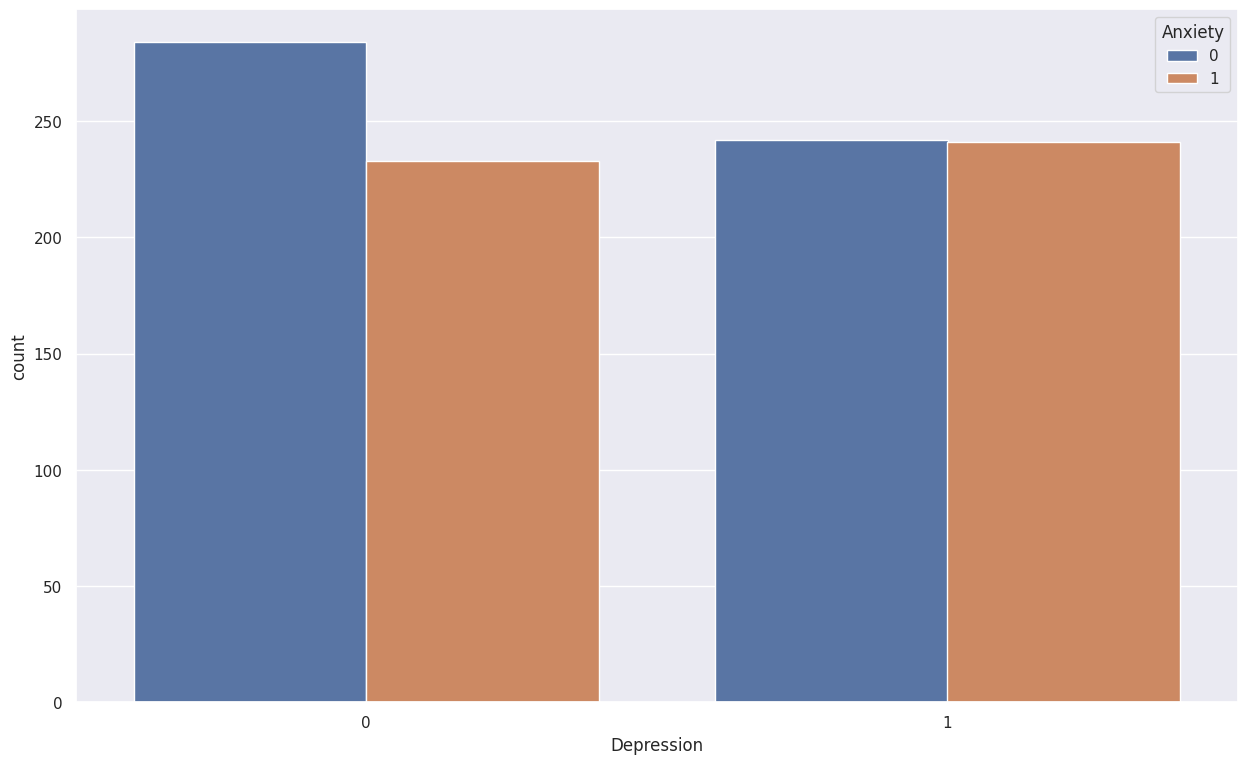

In [26]:
sns.countplot(df, x='Depression', hue='Anxiety');

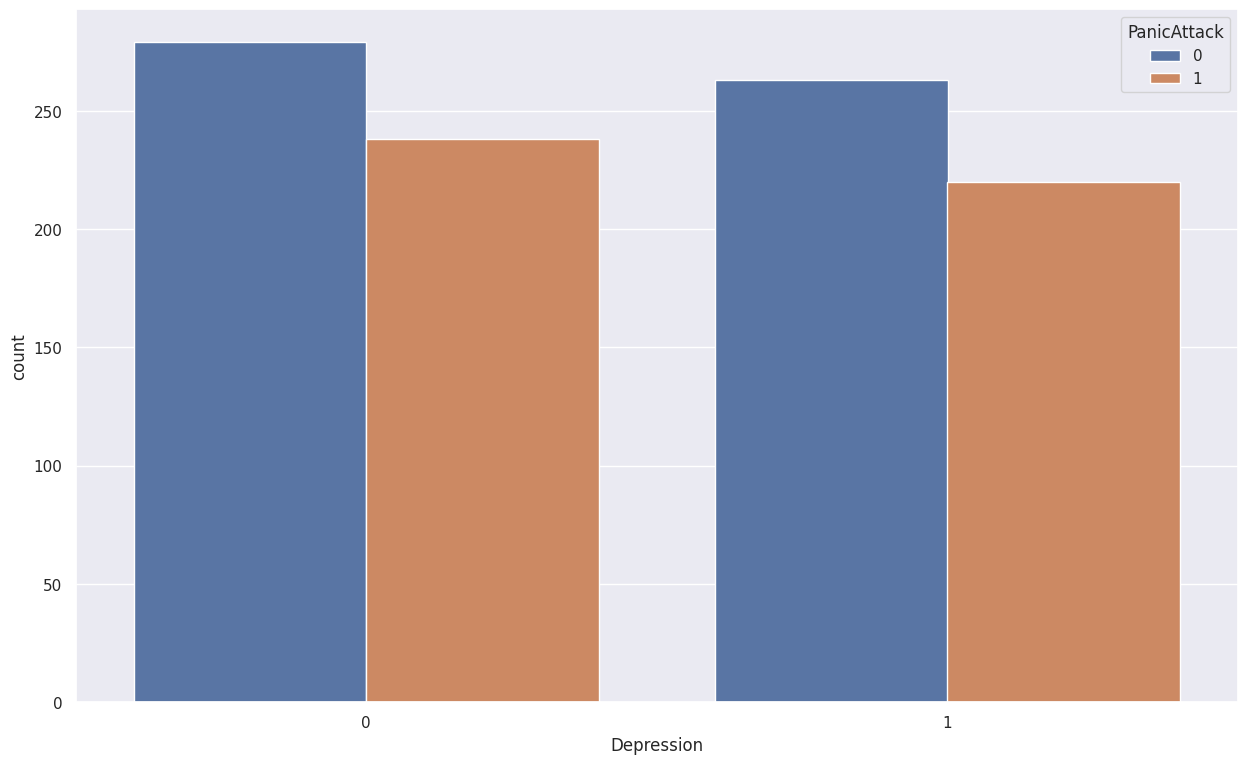

In [27]:
sns.countplot(df, x='Depression', hue='PanicAttack');

According to our data participants with depression have the same anxiety and panick attack problems as participants without depression. Thats' strange, currently we do not have an explanation to this.

## `SpecialistTreatment`

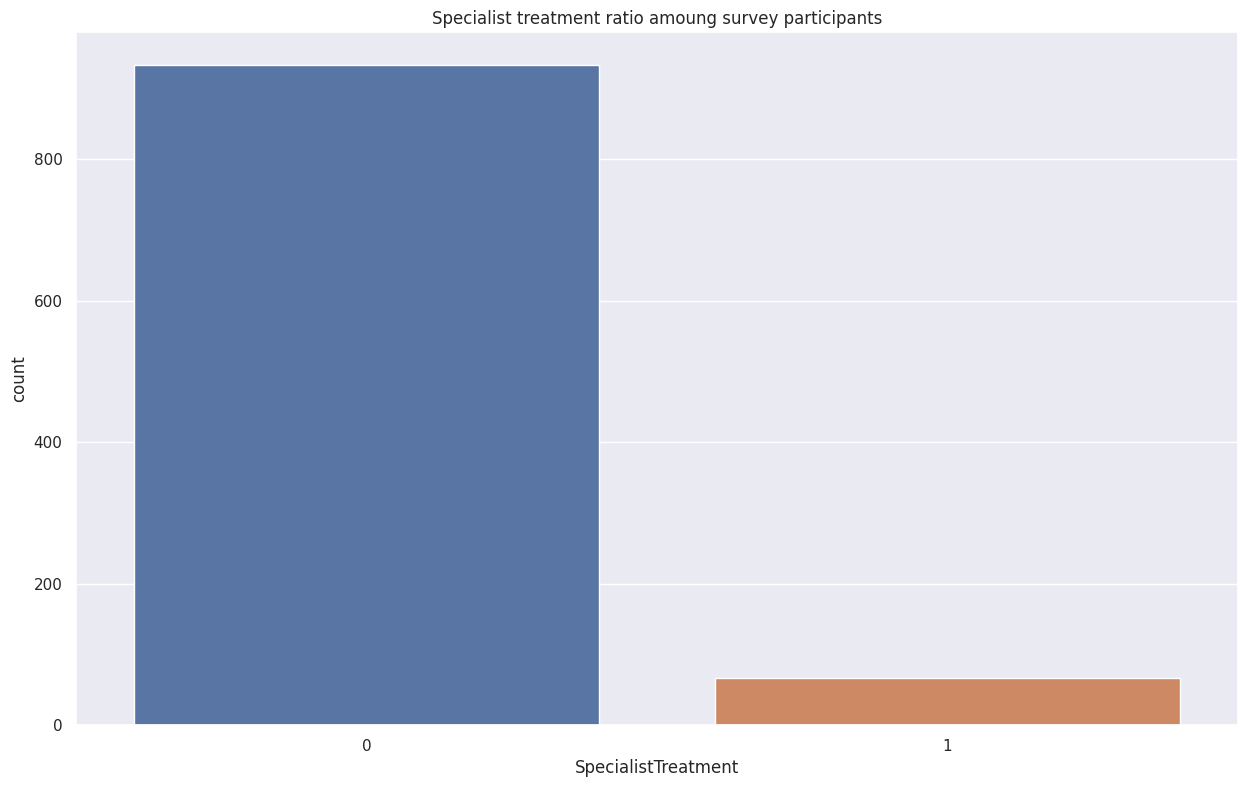

In [28]:
sns.countplot(df, x='SpecialistTreatment').set(title='Specialist treatment ratio amoung survey participants');

In [29]:
df[(df['Depression'] == 1) & (df['SpecialistTreatment'] == 1)].shape[0], df[df['Depression'] == 1].shape[0]

(30, 483)

That's sad. Only 30 (amoung 483) survey participants with depression recieve specialist treatment. Let's also check `HasMentalHealthSupport`

## `HasMentalHealthSupport`

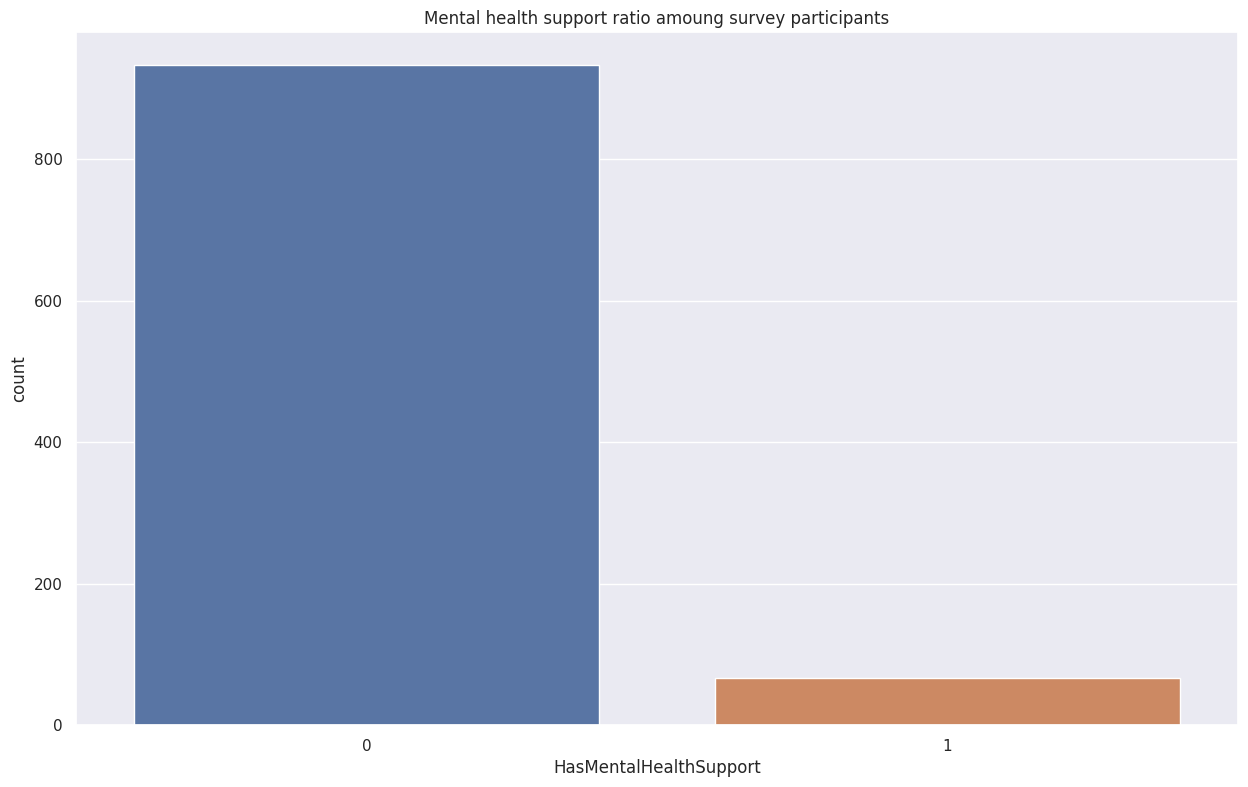

In [30]:
sns.countplot(df, x='HasMentalHealthSupport').set(title='Mental health support ratio amoung survey participants');

In [31]:
df[(df['Depression'] == 1) & (df['HasMentalHealthSupport'] == 1)].shape[0], df[df['Depression'] == 1].shape[0]

(30, 483)

Once again the amount of students with mental health support is very low.

## `SleepQuality` and `StudyStressLevel`

Let's check wheather sleep quality of study stress level correlate with depression, anxiety or panick attacks.

In [32]:
df[['Depression', 'Anxiety', 'PanicAttack', 'SleepQuality', 'StudyStressLevel']].corr()

,Depression,Anxiety,PanicAttack,SleepQuality,StudyStressLevel
Depression,1.000000,0.048325,-0.004876,-0.016646,-0.001038
Anxiety,0.048325,1.000000,0.027768,-0.019701,0.036289
PanicAttack,-0.004876,0.027768,1.000000,-0.001719,0.052973
SleepQuality,-0.016646,-0.019701,-0.001719,1.000000,0.004863
StudyStressLevel,-0.001038,0.036289,0.052973,0.004863,1.000000


We observe no significant correlation between sleep quality, study stress level and depression, anxiety and panick attacks. Thats counter intuitive. We currently have no explanation to that.